# Analisando o engajamento do Instagram

### O que queremos responder?
- Qual tipo de conteúdo **mais engaja** no Instagram da minha empresa?
<br><br>
- Temos a base de dados do Instagram **desde que o usuário começou a postar na marca até o dia 27/março**
<br><br>
- Ele também dá alguns direcionamentos:
    - Podem ignorar a coluna visualizações, queremos entender apenas curtidas, comentários e interações
    - Tags vazias é que realmente não possuem tag (favor tratar como vazio)

### Como ele pediu para não considerar a coluna visualizações, vamos retirar essa coluna da base

**O .drop() permite apagar uma coluna ou linha da base:** <br>
base<font color="blue">**.drop(**</font>nome_coluna,axis=1<font color="blue">**)**</font>
- O axis = 1 se refere a coluna, enquanto axis = 0 se refere a linha
- Devemos passar o nome da coluna que queremos apagar da base
- Em caso de mais de 1 coluna, passamos a lista entre colchetes

### Vamos importar e visualizar a nossa base

In [474]:
# Importando o pandas
import pandas as pd
import datetime
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [475]:
# Para melhorar a visualização, vamos criar um padrão no formato dos valores
pd.options.display.float_format = '{:,.2f}'.format

# Importar a base em excel
# - Base: 08. Analisando o engajamento no Instagram.xlsx
df = pd.read_excel(r'C:\Users\Virtual Office\08. Analisando o engajamento no Instagram.xlsx')
display(df.head(10))

,Tipo,Data,Curtidas,Comentários,Visualizações,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,NaN,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,NaN,Loja/Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,NaN,Loja,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,"82,878.00",Produtos,N,N,NaN,5164
4,Foto,2021-09-13,4392,45,NaN,Produtos,S,N,NaN,4437
5,Foto,2021-09-17,5359,62,NaN,Novos Produtos,N,S,S,5421
6,Foto,2021-09-19,21597,852,NaN,Novos Produtos,S,S,NaN,22449
7,Foto,2021-09-25,6346,33,NaN,Produtos,N,S,NaN,6379
8,Foto,2021-09-27,6355,89,NaN,Produtos,S,N,S,6444
9,Vídeo,2021-09-28,4056,81,"73,174.00",Produtos,N,N,NaN,4137


In [476]:
#Convertendo os dados para melhor tipo possível
df = df.convert_dtypes()
#Visualizando como as colunas estão dispostas
print(df.columns)
#Pegando as informações referente a data
df['Data'] = pd.to_datetime(df['Data'], format='%Y%m%d')
df['Dia'] = df['Data'].dt.day
df['Mes'] = df['Data'].dt.month
df['Ano'] = df['Data'].dt.year
#Removeendo colunas que já na primeira analise não úteis para o projeto e que poluirão os resultados
df = df.drop(columns = ['Data', 'Visualizações'], axis = 1)
# Remover espaços extras no nome da coluna 'Interações'
df = df.rename(columns={'Interacoes ': 'Interacoes'})

display(df.head(10))

Index(['Tipo', 'Data', 'Curtidas', 'Comentários', 'Visualizações', 'Tags',
       'Pessoas', 'Campanhas', 'Carrossel', 'Interacoes '],
      dtype='object')


,Tipo,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes,Dia,Mes,Ano
0,Foto,2858,16,Loja,N,N,<NA>,2874,11,9,2021
1,Foto,2930,28,Loja/Produtos,N,N,<NA>,2958,11,9,2021
2,Foto,2807,9,Loja,N,N,<NA>,2816,11,9,2021
3,Vídeo,5115,49,Produtos,N,N,<NA>,5164,12,9,2021
4,Foto,4392,45,Produtos,S,N,<NA>,4437,13,9,2021
5,Foto,5359,62,Novos Produtos,N,S,S,5421,17,9,2021
6,Foto,21597,852,Novos Produtos,S,S,<NA>,22449,19,9,2021
7,Foto,6346,33,Produtos,N,S,<NA>,6379,25,9,2021
8,Foto,6355,89,Produtos,S,N,S,6444,27,9,2021
9,Vídeo,4056,81,Produtos,N,N,<NA>,4137,28,9,2021


In [477]:
#Visualizando e entendo com que tipo de dados e farmato estou trabalhando. Consigo compreender o tipo,
#quantas linhas, quantas colunas e quantidade de dados nulos ou vazios.
df.info()
df.shape
display(df.isnull().sum())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Tipo         52 non-null     string
 1   Curtidas     52 non-null     Int64 
 2   Comentários  52 non-null     Int64 
 3   Tags         44 non-null     string
 4   Pessoas      52 non-null     string
 5   Campanhas    52 non-null     string
 6   Carrossel    8 non-null      string
 7   Interacoes   52 non-null     Int64 
 8   Dia          52 non-null     int32 
 9   Mes          52 non-null     int32 
 10  Ano          52 non-null     int32 
dtypes: Int64(3), int32(3), string(5)
memory usage: 4.1 KB


Tipo            0
Curtidas        0
Comentários     0
Tags            8
Pessoas         0
Campanhas       0
Carrossel      44
Interacoes      0
Dia             0
Mes             0
Ano             0
dtype: int64

,Curtidas,Comentários,Interacoes,Dia,Mes,Ano
count,52.00,52.00,52.00,52.00,52.00,52.00
mean,"12,262.73",189.50,"12,452.23",16.00,6.00,"2,021.52"
std,"8,165.88",170.69,"8,299.39",7.93,4.24,0.50
min,"2,807.00",9.00,"2,816.00",2.00,1.00,"2,021.00"
25%,"5,492.00",69.50,"5,562.50",10.00,2.00,"2,021.00"
50%,"9,603.00",128.00,"9,773.50",14.00,3.00,"2,022.00"
75%,"17,621.75",265.25,"17,920.75",23.25,10.00,"2,022.00"
max,"37,351.00",852.00,"37,853.00",30.00,12.00,"2,022.00"


### Carrossel possui apenas 8 valores não nulos
- Vamos entender os valores de carrossel

In [478]:
df.loc[df.Carrossel.isnull(),'Carrossel']

0     <NA>
1     <NA>
2     <NA>
3     <NA>
4     <NA>
6     <NA>
7     <NA>
9     <NA>
10    <NA>
11    <NA>
13    <NA>
14    <NA>
15    <NA>
16    <NA>
17    <NA>
18    <NA>
19    <NA>
20    <NA>
22    <NA>
23    <NA>
24    <NA>
27    <NA>
29    <NA>
30    <NA>
31    <NA>
32    <NA>
33    <NA>
34    <NA>
35    <NA>
36    <NA>
37    <NA>
38    <NA>
39    <NA>
41    <NA>
42    <NA>
43    <NA>
44    <NA>
45    <NA>
46    <NA>
47    <NA>
48    <NA>
49    <NA>
50    <NA>
51    <NA>
Name: Carrossel, dtype: string

In [479]:
df.loc[df.Carrossel.notnull(),'Carrossel']

5     S
8     S
12    S
21    S
25    S
26    S
28    S
40    S
Name: Carrossel, dtype: string

- Na verdade, os valores nulos são de postagens que não são carrossel. Sendo assim o nulo deveria ser "N"

In [480]:
# Removendo a coluna devido 44 valores nulos
df.loc[df.Carrossel.isnull(),'Carrossel'] = 'N'

In [481]:
#Visualizando e entendo com que tipo de dados e farmato estou trabalhando. Consigo compreender o tipo,
#quantas linhas, quantas colunas e quantidade de dados nulos ou vazios.
df.info()
df.shape
display(df.isnull().sum())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Tipo         52 non-null     string
 1   Curtidas     52 non-null     Int64 
 2   Comentários  52 non-null     Int64 
 3   Tags         44 non-null     string
 4   Pessoas      52 non-null     string
 5   Campanhas    52 non-null     string
 6   Carrossel    52 non-null     string
 7   Interacoes   52 non-null     Int64 
 8   Dia          52 non-null     int32 
 9   Mes          52 non-null     int32 
 10  Ano          52 non-null     int32 
dtypes: Int64(3), int32(3), string(5)
memory usage: 4.1 KB


Tipo           0
Curtidas       0
Comentários    0
Tags           8
Pessoas        0
Campanhas      0
Carrossel      0
Interacoes     0
Dia            0
Mes            0
Ano            0
dtype: int64

,Curtidas,Comentários,Interacoes,Dia,Mes,Ano
count,52.00,52.00,52.00,52.00,52.00,52.00
mean,"12,262.73",189.50,"12,452.23",16.00,6.00,"2,021.52"
std,"8,165.88",170.69,"8,299.39",7.93,4.24,0.50
min,"2,807.00",9.00,"2,816.00",2.00,1.00,"2,021.00"
25%,"5,492.00",69.50,"5,562.50",10.00,2.00,"2,021.00"
50%,"9,603.00",128.00,"9,773.50",14.00,3.00,"2,022.00"
75%,"17,621.75",265.25,"17,920.75",23.25,10.00,"2,022.00"
max,"37,351.00",852.00,"37,853.00",30.00,12.00,"2,022.00"


In [482]:
# Visualizando as 5 primeiras linhas
df.head()

,Tipo,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes,Dia,Mes,Ano
0,Foto,2858,16,Loja,N,N,N,2874,11,9,2021
1,Foto,2930,28,Loja/Produtos,N,N,N,2958,11,9,2021
2,Foto,2807,9,Loja,N,N,N,2816,11,9,2021
3,Vídeo,5115,49,Produtos,N,N,N,5164,12,9,2021
4,Foto,4392,45,Produtos,S,N,N,4437,13,9,2021


In [483]:
# Visualizando as 5 ultimas linhas
df.tail()

,Tipo,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes,Dia,Mes,Ano
47,IGTV,5489,77,Dicas de como usar/Novos Produtos,S,N,N,5566,12,3,2022
48,Foto,29084,479,Datas comemorativas/Promoções,S,S,N,29563,20,3,2022
49,Foto,9087,106,<NA>,S,S,N,9193,22,3,2022
50,Foto,16551,186,<NA>,S,N,N,16737,26,3,2022
51,IGTV,4934,65,Dicas de como usar/Produtos,S,N,N,4999,27,3,2022


In [484]:
# Agrupando os dados por tipo 
df_tipo = df.drop(columns = ['Tags', 'Pessoas','Campanhas','Carrossel','Dia','Mes','Ano'], axis = 1)
df_tipo = df_tipo.groupby(by='Tipo').sum()
display(df_tipo)

,Curtidas,Comentários,Interacoes
Tipo,,,
Foto,480281,6963,487244
IGTV,34167,668,34835
Reels,74365,1222,75587
Vídeo,48849,1001,49850


### Visualizando essas informações de maneira gráfica

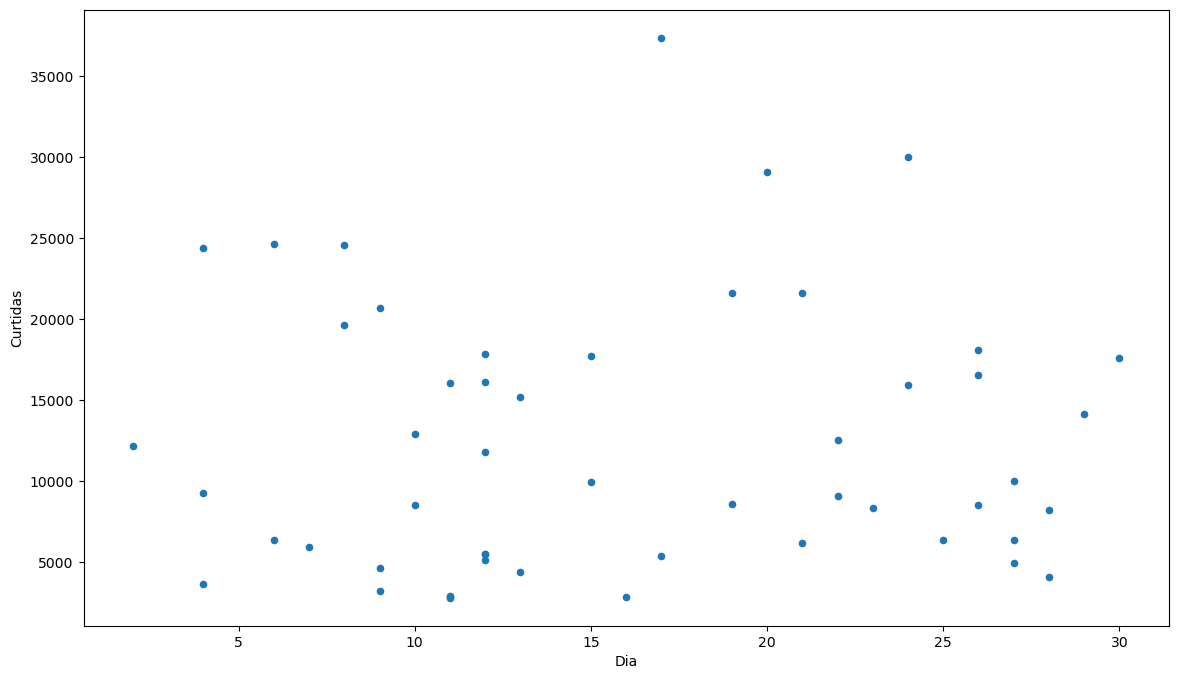

In [485]:
# Um gráfico de dispersão ajudaria a entender melhor curtidas e comentários
df.plot(kind="scatter",x="Dia",y="Curtidas",figsize=(14,8));

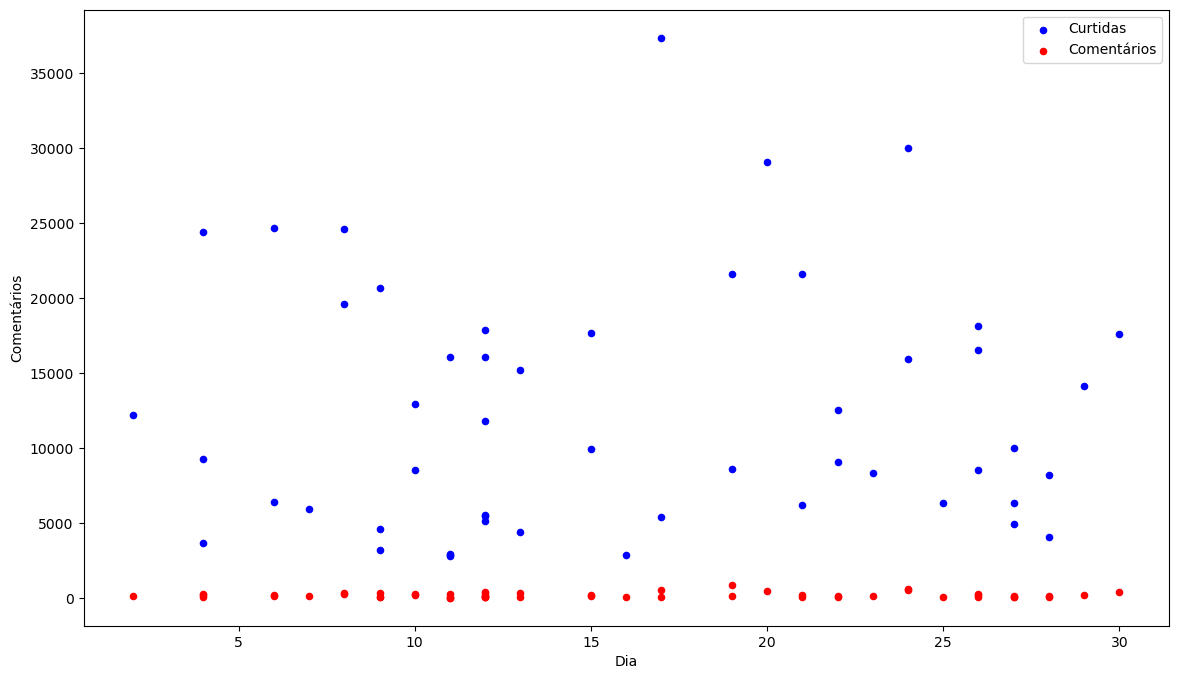

In [486]:
# Podemos colocar curtidas e comentários no mesmo gráfico
ax = df.plot(kind="scatter",x="Dia",y="Curtidas",color="blue",label="Curtidas",figsize=(14,8));
df.plot(kind="scatter",x="Dia",y="Comentários",color="red",label="Comentários",figsize=(14,8),ax=ax);

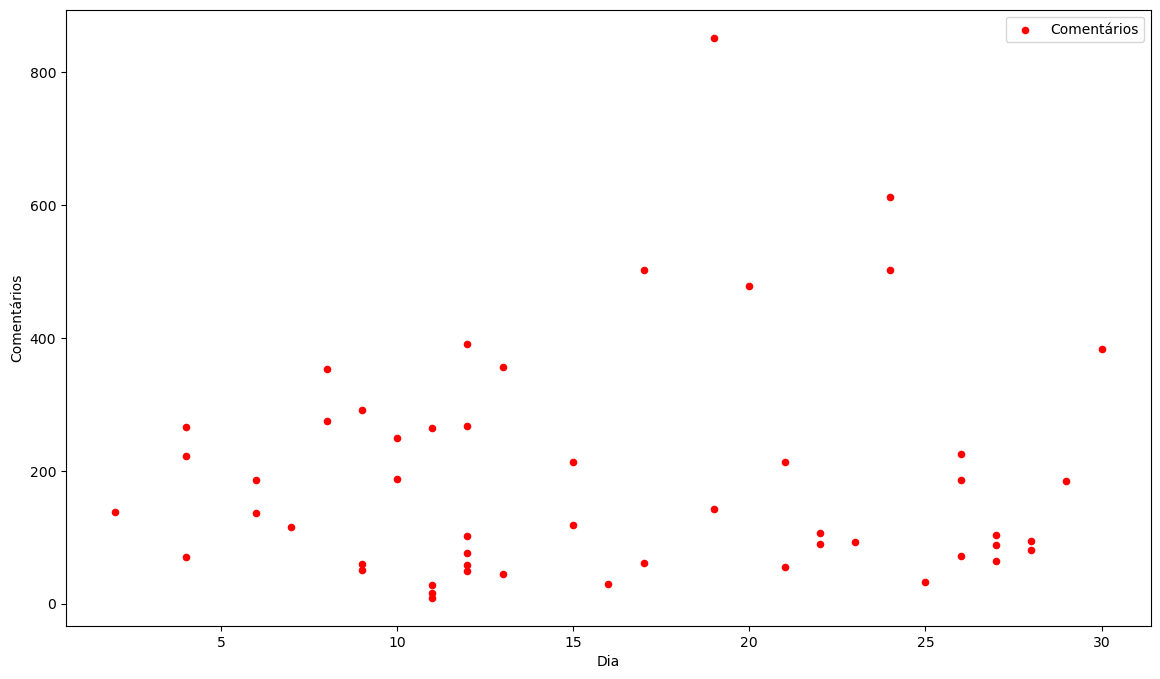

In [487]:
# A escala de curtidas pode estar atrapalhando a visualização, por isso vamos deixar comentários em um gráfico separado
df.plot(kind="scatter",x="Dia",y="Comentários",color="red",label="Comentários",figsize=(14,8));

- O gráfico e as informações estatítiscas não estão dizendo muita coisa pois existe uma grande dispersão entre curtidas e comentários
- Precisamos verificar se existe um padrão usando as outras colunas de informações

### A primeira coisa que podemos fazer é pegar os 5 primeiros registros com mais e menos curtidas

In [488]:
# Ordenando os valores por curtidas
df.sort_values(by="Curtidas",ascending=False).head(30)

,Tipo,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes,Dia,Mes,Ano
39,Foto,37351,502,Promoções,S,S,N,37853,17,2,2022
30,Reels,29981,502,Trends,S,S,N,30483,24,1,2022
48,Foto,29084,479,Datas comemorativas/Promoções,S,S,N,29563,20,3,2022
33,Foto,24655,186,Influenciadores,S,S,N,24841,6,2,2022
26,Foto,24585,354,Datas comemorativas,S,S,S,24939,8,1,2022
43,Foto,24399,266,<NA>,S,S,N,24665,4,3,2022
40,Foto,21621,213,Influenciadores,S,S,S,21834,21,2,2022
6,Foto,21597,852,Novos Produtos,S,S,N,22449,19,9,2021
34,Foto,20660,292,Influenciadores,S,S,N,20952,9,2,2022
45,Reels,19621,275,Trends,S,S,N,19896,8,3,2022


In [489]:
# Selecionando os 5 últimos valores 
# Ordenando os valores
df.sort_values(by="Curtidas",ascending=False).tail(10)

,Tipo,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes,Dia,Mes,Ano
51,IGTV,4934,65,Dicas de como usar/Produtos,S,N,N,4999,27,3,2022
46,Foto,4613,50,Influenciadores,S,N,N,4663,9,3,2022
4,Foto,4392,45,Produtos,S,N,N,4437,13,9,2021
9,Vídeo,4056,81,Produtos,N,N,N,4137,28,9,2021
15,Vídeo,3646,71,Produtos,N,N,N,3717,4,11,2021
17,Vídeo,3213,60,Produtos,N,N,N,3273,9,11,2021
1,Foto,2930,28,Loja/Produtos,N,N,N,2958,11,9,2021
20,Foto,2881,29,Produtos,N,N,N,2910,16,12,2021
0,Foto,2858,16,Loja,N,N,N,2874,11,9,2021
2,Foto,2807,9,Loja,N,N,N,2816,11,9,2021


- Podemos observar que no top 5 todas as postagens tinham pessoas e eram fotos de campanha
- Nas 5 piores postagens, não haviam pessoas e nem eram postagens de campanhas
<br><br>
- **Isso pode ser um indicador que pessoas e campanhas tem relação com as curtidas**

In [490]:
# Agrupando as informações por tipo e pessoas

df1 = df.groupby(["Tipo",'Pessoas'])["Comentários"].count()
df1_1 = df.groupby(["Tipo",'Pessoas'])["Comentários"].mean()

tipos = ['Foto', 'IGTV', 'Reels', 'Vídeo']
# Colunas para plotagem
colunas = ['Curtidas', 'Comentários', 'Interacoes']

pessoas_sim = df.loc[(df['Tipo'].isin(tipos)) & (df['Pessoas'] == 'S')]
pessoas_nao = df.loc[(df['Tipo'].isin(tipos)) & (df['Pessoas'] == 'N')]

display(df1)
display(df1_1)


# Criando figuras de subplots
fig = go.Figure()

# Plotando barras lado a lado
for coluna in colunas:
    fig.add_trace(go.Bar(
        x=['Pessoas Sim', 'Pessoas Não'],
        y=[pessoas_sim[coluna].mean(), pessoas_nao[coluna].mean()],
        text=[round(pessoas_sim[coluna].mean(), 2), round(pessoas_nao[coluna].mean(), 2)],
        textposition='auto',
        name=coluna,
    ))

# Atualizando layout do gráfico
fig.update_layout(
    barmode='group',
    xaxis_title='Grupos',
    yaxis_title='Valores',
    title='Comparação entre Pessoas Sim e Não para Curtidas, Comentários e Interacoes',
    title_x=0.5,  # Define a posição horizontal do título (0 a 1, sendo 0 à esquerda e 1 à direita)
    plot_bgcolor='#e5ecf6',  # Altere a cor de fundo para a cor desejada
    paper_bgcolor='#e5ecf6'  # Altera a cor de fundo do papel (background fora do gráfico)
)

fig.show()


# Agrupando as informações por tipo e pessoas
df2 = df.groupby(["Tipo",'Pessoas'])["Curtidas"].mean()
df2_1 = df.groupby(["Tipo",'Pessoas'])["Curtidas"].count()

tipos = ['Foto', 'IGTV', 'Reels', 'Vídeo']
# Colunas para plotagem
colunas = ['Curtidas', 'Comentários', 'Interacoes']

campanha_sim = df.loc[(df['Tipo'].isin(tipos)) & (df['Campanhas'] == 'S')]
campanha_nao = df.loc[(df['Tipo'].isin(tipos)) & (df['Campanhas'] == 'N')]

display(df2)
display(df2_1)

# Criando figuras de subplots
fig2 = go.Figure()

# Plotando barras lado a lado
for coluna in colunas:
    fig2.add_trace(go.Bar(
        x=['Capanha Sim', 'Campanha Não'],
        y=[campanha_sim[coluna].mean(), campanha_nao[coluna].mean()],
        text=[round(campanha_sim[coluna].mean(), 2), round(campanha_nao[coluna].mean(), 2)],
        textposition='auto',
        name=coluna
    ))

# Atualizando layout do gráfico
fig2.update_layout(
    barmode='group',
    xaxis_title='Grupos',
    yaxis_title='Valores',
    title='Comparação entre Campanha Sim e Não para Curtidas, Comentários e Interacoes',
    title_x=0.5,  # Define a posição horizontal do título (0 a 1, sendo 0 à esquerda e 1 à direita)
    plot_bgcolor='#e5ecf6' , # Altere a cor de fundo para a cor desejada
    paper_bgcolor='#e5ecf6'  # Altera a cor de fundo do papel (background fora do gráfico)
)

fig2.show()

# Agrupando as informações por tipo e pessoas
df3 = df.groupby(["Tipo",'Pessoas','Campanhas'])["Interacoes"].mean()
df3_1 = df.groupby(["Tipo",'Pessoas','Campanhas'])["Interacoes"].count()

display(df3)
display(df3_1)

pessoas_e_campanha_sim = df.loc[(df['Tipo'].isin(tipos)) & (df['Pessoas'] == 'S') & (df['Campanhas'] == 'S')]
pessoas_e_campanha_nao = df.loc[(df['Tipo'].isin(tipos)) & (df['Pessoas'] == 'N') & (df['Campanhas'] == 'N')]

# Criando figuras de subplots
fig3 = go.Figure()

# Plotando barras lado a lado
for coluna in colunas:
    fig3.add_trace(go.Bar(
        x=['Pessoas e Campanha Sim', 'Pessoas e Campanha Não'],
        y=[pessoas_e_campanha_sim[coluna].mean(),pessoas_e_campanha_nao[coluna].mean()],
        text=[round(pessoas_e_campanha_sim[coluna].mean(), 2), round(pessoas_e_campanha_nao[coluna].mean(), 2)],
        textposition='auto',
        name=coluna
    ))

# Atualizando layout do gráfico
fig3.update_layout(
    barmode='group',
    xaxis_title='Grupos',
    yaxis_title='Valores',
    title='Comparação entre Campanha Sim e Não para Curtidas, Comentários e Interacoes',
    title_x=0.5,  # Define a posição horizontal do título (0 a 1, sendo 0 à esquerda e 1 à direita)
    plot_bgcolor='#e5ecf6',  # Altere a cor de fundo para a cor desejada
    paper_bgcolor='#e5ecf6'  # Altera a cor de fundo do papel (background fora do gráfico)
)

fig3.show()

Tipo   Pessoas
Foto   N           6
       S          30
IGTV   S           5
Reels  N           2
       S           3
Vídeo  N           4
       S           2
Name: Comentários, dtype: int64

Tipo   Pessoas
Foto   N          29.50
       S         226.20
IGTV   S         133.60
Reels  N          98.00
       S         342.00
Vídeo  N          65.25
       S         370.00
Name: Comentários, dtype: Float64

Tipo   Pessoas
Foto   N          3,863.50
       S         15,236.67
IGTV   S          6,833.40
Reels  N          5,934.50
       S         20,832.00
Vídeo  N          4,007.50
       S         16,409.50
Name: Curtidas, dtype: Float64

Tipo   Pessoas
Foto   N           6
       S          30
IGTV   S           5
Reels  N           2
       S           3
Vídeo  N           4
       S           2
Name: Curtidas, dtype: int64

Tipo   Pessoas  Campanhas
Foto   N        N            2,889.50
                S            5,900.00
       S        N           10,975.21
                S           19,389.56
IGTV   S        N            6,967.00
Reels  N        N            6,032.50
       S        N           13,143.00
                S           25,189.50
Vídeo  N        N            4,072.75
       S        S           16,779.50
Name: Interacoes, dtype: Float64

Tipo   Pessoas  Campanhas
Foto   N        N             4
                S             2
       S        N            14
                S            16
IGTV   S        N             5
Reels  N        N             2
       S        N             1
                S             2
Vídeo  N        N             4
       S        S             2
Name: Interacoes, dtype: int64

# Conclusões

 * Podemos inferir que conteúdos com pessoas performam melhor que conteúdos sem pessoas.
 * Podemos inferir que conteúdos de campanha performam melhor que conteúdos não campanha.
 * Podemos inferir que conteúdos de campanhas com pessoas performam muito melhor do que conteúdos de campanhas sem pessoas.
     - Então na decisão de investir em uma campanha o melhor formato é a que contém pessoas;

# Vamos analisar como os conteúdos criados performam por dia  e mês para 2021

In [491]:
# Criando uma lista com os anos que há no dataframe
print(df['Ano'].unique())
anos = ['2021', '2022']
# Convertendo a coluna 'Ano' para string e filtrando apenas os registros de 2021
df_2021 = df[df['Ano'].astype(str) == '2021']
df_2022 = df[df['Ano'].astype(str) == '2022']

display(df_2021.head(10))
display(df_2022.head(10))


[2021 2022]


,Tipo,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes,Dia,Mes,Ano
0,Foto,2858,16,Loja,N,N,N,2874,11,9,2021
1,Foto,2930,28,Loja/Produtos,N,N,N,2958,11,9,2021
2,Foto,2807,9,Loja,N,N,N,2816,11,9,2021
3,Vídeo,5115,49,Produtos,N,N,N,5164,12,9,2021
4,Foto,4392,45,Produtos,S,N,N,4437,13,9,2021
5,Foto,5359,62,Novos Produtos,N,S,S,5421,17,9,2021
6,Foto,21597,852,Novos Produtos,S,S,N,22449,19,9,2021
7,Foto,6346,33,Produtos,N,S,N,6379,25,9,2021
8,Foto,6355,89,Produtos,S,N,S,6444,27,9,2021
9,Vídeo,4056,81,Produtos,N,N,N,4137,28,9,2021


,Tipo,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes,Dia,Mes,Ano
25,Foto,12193,138,Novos Produtos,S,N,S,12331,2,1,2022
26,Foto,24585,354,Datas comemorativas,S,S,S,24939,8,1,2022
27,Foto,16067,265,Novos Produtos,S,N,N,16332,11,1,2022
28,Foto,9936,119,Novos Produtos,S,N,S,10055,15,1,2022
29,Foto,8612,142,<NA>,S,N,N,8754,19,1,2022
30,Reels,29981,502,Trends,S,S,N,30483,24,1,2022
31,Foto,10019,103,Novos Produtos,S,N,N,10122,27,1,2022
32,IGTV,9270,222,Dicas de como usar/Produtos,S,N,N,9492,4,2,2022
33,Foto,24655,186,Influenciadores,S,S,N,24841,6,2,2022
34,Foto,20660,292,Influenciadores,S,S,N,20952,9,2,2022


In [492]:
df_2021_selecionado = df_2021.loc[:, ['Curtidas', 'Comentários', 'Interacoes', 'Pessoas', 'Campanhas', 'Dia','Mes','Ano']]

display(df_2021_selecionado.head(5))

# Reorganizando os dados para usar o 'Dia' como índice e as métricas como colunas
df_melted = df_2021_selecionado.melt(id_vars=['Dia'], value_vars=['Curtidas', 'Comentários', 'Interacoes'], var_name='Métrica', value_name='Valor')

# Criando um gráfico de barras agrupadas para cada métrica ao longo dos dias
fig4 = px.bar(df_melted, x='Dia', y='Valor', color='Métrica', barmode='group', title='Métricas de Curtidas, Comentários e Interacoes por Dia em 2021',
             labels={'Valor': 'Valor da Métrica', 'Dia': 'Dia'})

# Atualizando as configurações para adicionar rótulos fora das barras com tamanho maior
fig4.update_traces(text=fig4.data[0]['y'], textposition='outside', textfont=dict(size=40))  # Ajuste o tamanho da fonte conforme necessário

# Exibindo o gráfico
fig4.update_layout(
    plot_bgcolor='#e5ecf6',  # Altere a cor de fundo para a cor desejada
    paper_bgcolor='#e5ecf6',  # Altera a cor de fundo do papel (background fora do gráfico)
    title_x=0.5,  # Define a posição horizontal do título (0 a 1, sendo 0 à esquerda e 1 à direita)
)


# Exibindo o gráfico
fig4.show()

# Convertendo a coluna 'Mes' para nome do mês em formato de string
meses = {1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril', 5: 'Maio', 6: 'Junho', 7: 'Julho', 8: 'Agosto', 9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'}
df_2021_selecionado['Mes'] = df_2021_selecionado['Mes'].map(meses)

# Reorganizando os dados para usar o 'Mês' como índice e as métricas como colunas
df_melted2 = df_2021_selecionado.melt(id_vars=['Mes'], value_vars=['Curtidas', 'Comentários', 'Interacoes'], var_name='Métrica', value_name='Valor')

# Criando um gráfico de barras agrupadas para cada métrica ao longo dos meses
fig5 = px.bar(df_melted2, x='Mes', y='Valor', color='Métrica', barmode='group', title='Métricas de Curtidas, Comentários e Interacoes por Mês em 2021',
             labels={'Valor': 'Valor da Métrica', 'Mes': 'Mês'})

# Atualizando as configurações para adicionar rótulos dentro das barras
fig5.update_traces(text=fig5.data[0]['y'], textposition='inside')

# Exibindo o gráfico
fig5.update_layout(
    plot_bgcolor='#e5ecf6' , # Altere a cor de fundo para a cor desejada
    paper_bgcolor='#e5ecf6',  # Altera a cor de fundo do papel (background fora do gráfico)
    title_x=0.5,  # Define a posição horizontal do título (0 a 1, sendo 0 à esquerda e 1 à direita)
)


# Exibindo o gráfico
fig5.show()

,Curtidas,Comentários,Interacoes,Pessoas,Campanhas,Dia,Mes,Ano
0,2858,16,2874,N,N,11,9,2021
1,2930,28,2958,N,N,11,9,2021
2,2807,9,2816,N,N,11,9,2021
3,5115,49,5164,N,N,12,9,2021
4,4392,45,4437,S,N,13,9,2021


# Vamos analisar como os conteúdos criados performam por dia  e mês para 2022

In [493]:
df_2022_selecionado = df_2022.loc[:, ['Curtidas', 'Comentários', 'Interacoes', 'Pessoas', 'Campanhas', 'Dia','Mes','Ano']]
display(df_2022_selecionado.head(5))

# Criando um gráfico de barras agrupadas para cada métrica ao longo dos dias
fig6 = px.bar(df_2022_selecionado, x='Dia', y=['Curtidas', 'Comentários', 'Interacoes'], barmode='group', 
              title='Métricas de Curtidas, Comentários e Interacoes por Dia em 2022',
              labels={'variable': 'Métrica','value': 'Valor da Métrica', 'Dia': 'Dia'})

# Atualizando as configurações para adicionar rótulos fora das barras com tamanho maior
fig6.update_traces(textposition='outside', textfont=dict(size=14))

# Personalizando o layout do gráfico
fig6.update_layout(
    plot_bgcolor='#e5ecf6',  # Cor de fundo do gráfico
    paper_bgcolor='#e5ecf6',  # Cor de fundo do papel (background fora do gráfico)
    title_x=0.5  # Posição horizontal do título (0 a 1, sendo 0 à esquerda e 1 à direita)
)

# Exibindo o gráfico
fig6.show()

# Convertendo a coluna 'Mes' para nome do mês em formato de string
meses = {1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril', 5: 'Maio', 6: 'Junho', 7: 'Julho', 8: 'Agosto', 9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'}
df_2022_selecionado['Mes'] = df_2022_selecionado['Mes'].map(meses)

# Criando um gráfico de barras agrupadas para cada métrica ao longo dos meses
fig7 = px.bar(df_2022_selecionado, x='Mes', y=['Curtidas', 'Comentários', 'Interacoes'], barmode='group',
              title='Métricas de Curtidas, Comentários e Interacoes por Mês em 2022',
              labels={'variable': 'Métrica','value': 'Valor da Métrica', 'Mes': 'Mês'})

# Atualizando as configurações para adicionar rótulos dentro das barras
fig7.update_traces(text=fig7.data[0]['y'], textposition='inside', textfont=dict(size=14))

# Exibindo o gráfico
fig7.update_layout(
    plot_bgcolor='#e5ecf6' , # Altere a cor de fundo para a cor desejada
    paper_bgcolor='#e5ecf6',  # Altera a cor de fundo do papel (background fora do gráfico)
    title_x=0.5,  # Define a posição horizontal do título (0 a 1, sendo 0 à esquerda e 1 à direita)
)

# Exibindo o gráfico
fig7.show()

,Curtidas,Comentários,Interacoes,Pessoas,Campanhas,Dia,Mes,Ano
25,12193,138,12331,S,N,2,1,2022
26,24585,354,24939,S,S,8,1,2022
27,16067,265,16332,S,N,11,1,2022
28,9936,119,10055,S,N,15,1,2022
29,8612,142,8754,S,N,19,1,2022


In [494]:
# Criando um gráfico de barras agrupadas para cada métrica ao longo dos dias
fig6 = px.bar(df_2022, x='Dia', y=['Curtidas', 'Comentários', 'Interacoes'], barmode='group', 
              title='Métricas de Curtidas, Comentários e Interacoes por Dia em 2022',
              labels={'value': 'Valor da Métrica', 'Dia': 'Dia'})

# Atualizando as configurações para adicionar rótulos fora das barras com tamanho maior
fig6.update_traces(textposition='outside', textfont=dict(size=14))

# Personalizando o layout do gráfico
fig6.update_layout(
    plot_bgcolor='#e5ecf6',  # Cor de fundo do gráfico
    paper_bgcolor='#e5ecf6',  # Cor de fundo do papel (background fora do gráfico)
    title_x=0.5  # Posição horizontal do título (0 a 1, sendo 0 à esquerda e 1 à direita)
)

# Exibindo o gráfico
fig6.show()

# Conslusões

* Dias de maior engajamento do publico no ano de 2021:
    * 10, 11, 19, 24, 26, 28, 29, 30
* Dias de maior engajamento do publico no ano de 2022: 
    * 4, 6, 8, 9, 15, 17, 20, 21, 22, 24, 26
* Não temos dados o suficiente para traçar um padrão de comportamento do público. Mas continuar observando ao longo do tempo
    as reações que o público tem aos conteúdos criados pode oferecer insights valiosos quanto ao momento ideal para postagem.

# Vamos analisar os conteúdos com base nas tags 

In [495]:
df.Tags = df.Tags.str.split('/')
# Selecione os registros onde a coluna 'Tags' é nula e atribua um valor nulo
# Identificar os valores nulos
valores_nulos = df.isnull()
# Substituir os valores nulos por NaN
df[valores_nulos] = float('NaN')
df = df.explode('Tags')
display(df.head(10))

,Tipo,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes,Dia,Mes,Ano
0,Foto,2858,16,Loja,N,N,N,2874,11,9,2021
1,Foto,2930,28,Loja,N,N,N,2958,11,9,2021
1,Foto,2930,28,Produtos,N,N,N,2958,11,9,2021
2,Foto,2807,9,Loja,N,N,N,2816,11,9,2021
3,Vídeo,5115,49,Produtos,N,N,N,5164,12,9,2021
4,Foto,4392,45,Produtos,S,N,N,4437,13,9,2021
5,Foto,5359,62,Novos Produtos,N,S,S,5421,17,9,2021
6,Foto,21597,852,Novos Produtos,S,S,N,22449,19,9,2021
7,Foto,6346,33,Produtos,N,S,N,6379,25,9,2021
8,Foto,6355,89,Produtos,S,N,S,6444,27,9,2021


In [496]:
df_tags = df.groupby('Tags')[['Curtidas','Comentários','Interacoes']].mean()
df_tags.sort_values('Curtidas', ascending =False)

,Curtidas,Comentários,Interacoes
Tags,,,
Promoções,"27,458.33",531.00,"27,989.33"
Datas comemorativas,"20,752.25",343.50,"21,095.75"
Trends,"20,024.00",352.25,"20,376.25"
Influenciadores,"15,197.29",161.71,"15,359.00"
Novos Produtos,"10,304.89",198.56,"10,503.44"
Dicas de como usar,"6,833.40",133.60,"6,967.00"
Produtos,"6,269.82",94.12,"6,363.94"
Loja,"2,865.00",17.67,"2,882.67"


In [497]:
df_tags_campanhas = df.groupby(['Campanhas','Tags'])[['Curtidas','Comentários','Interacoes']].mean()
df_tags_campanhas.sort_values('Curtidas', ascending =False)
display(df_tags_campanhas)

# Redefinir o índice para tornar 'Campanhas' e 'Tags' colunas do DataFrame
df_tags_campanhas= df_tags_campanhas.reset_index()

# Ordenando os dados para facilitar a visualização
df_tags_campanhas = df_tags_campanhas.sort_values(by=['Curtidas'], ascending=False)

# Plotando gráfico de barras para cada métrica
fig9 = px.bar(df_tags_campanhas, x='Tags', y='Curtidas', color='Campanhas',
              title='Média de Curtidas por Combinação de Campanhas e Tags',
              labels={'Curtidas': 'Média de Curtidas', 'Tags': 'Tags', 'Campanhas': 'Campanhas'})

# Adicionando rótulos
for index, row in df_tags_campanhas.iterrows():
    fig9.add_annotation(
        x=row['Tags'],
        y=row['Curtidas'],
        text=f"{row['Curtidas']:.2f}",  # Formatação do valor com 2 casas decimais
        showarrow=True,
        arrowhead=1,
        yshift=10 if index % 2 == 0 else -30,  # Ajuste para posicionamento dos rótulos
        xshift=0.25 if row['Campanhas'] == 'N' else -0.25  # Ajuste para posicionar corretamente em cada barra
    )

# Exibindo o gráfico com rótulos
fig9.update_layout(
    barmode='group',
    yaxis_title='Média de Curtidas',
    title='Média de Curtidas por Combinação de Campanhas e Tags',
    title_x=0.5,  # Define a posição horizontal do título (0 a 1, sendo 0 à esquerda e 1 à direita)
    plot_bgcolor='#e5ecf6',  # Altere a cor de fundo para a cor desejada
    paper_bgcolor='#e5ecf6'  # Altera a cor de fundo do papel (background fora do gráfico)
)

print('''
Podemos inferir:
    Em geral as Tags performam quando estão em Campanha.
Ação:
    Consolidar mais insights sobre o mehor tipo, no momento apropriado e no formato mais adequado para investir em uma campanha
    para ter o maior engajamento do público.
''')

fig9.show()


Curtidas  Comentários  Interacoes
Campanhas Tags                                                  
N         Dicas de como usar   6,833.40       133.60    6,967.00
          Influenciadores      6,402.00        72.00    6,474.00
          Loja                 2,865.00        17.67    2,882.67
          Novos Produtos       9,937.00       136.33   10,073.33
          Produtos             5,895.93        97.67    5,993.60
          Promoções           15,940.00       612.00   16,552.00
          Trends              12,894.00       249.00   13,143.00
S         Datas comemorativas 20,752.25       343.50   21,095.75
          Influenciadores     18,715.40       197.60   18,913.00
          Novos Produtos      11,040.67       323.00   11,363.67
          Produtos             9,074.00        67.50    9,141.50
          Promoções           33,217.50       490.50   33,708.00
          Trends              22,400.67       386.67   22,787.33


Podemos inferir:
    Em geral as Tags performam quando estão em Campanha.
Ação:
    Consolidar mais insights sobre o mehor tipo, no momento apropriado e no formato mais adequado para investir em uma campanha
    para ter o maior engajamento do público.



In [498]:
df_tags_tipo = df.groupby(['Tipo','Tags'])[['Curtidas','Comentários','Interacoes']].mean()
df_tags_tipo.sort_values('Curtidas', ascending =False)
display(df_tags_tipo)

# Redefinir o índice para tornar 'Campanhas' e 'Tags' colunas do DataFrame
df_tags_tipo = df_tags_tipo.reset_index()

# Ordenando os dados para facilitar a visualização
df_tags_tipo = df_tags_tipo.sort_values(by=['Curtidas'], ascending=False)

# Plotando gráfico de barras para cada métrica
fig8 = px.bar(df_tags_tipo, x='Tipo', y='Curtidas', color='Tags',
              title='Média de Curtidas por Combinação de Campanhas e Tags',
              labels={'Curtidas': 'Média de Curtidas', 'Tags': 'Tags', 'Tipo': 'Tipo'})

# Adicionando rótulos
for index, row in df_tags_tipo.iterrows():
    fig8.add_annotation(
        x=row['Tipo'],
        y=row['Curtidas'],
        text=f"{row['Curtidas']:.2f}",  # Formatação do valor com 2 casas decimais
        showarrow=True,
        arrowhead=1,
        yshift=10 if index % 2 == 0 else -20,  # Ajuste para posicionamento dos rótulos
        xshift=5 if row['Tipo'] == 'N' else -15 # Ajuste para posicionar corretamente em cada barra
    )

# Exibindo o gráfico com rótulos
fig8.update_layout(
    barmode='group',
    yaxis_title='Média de Curtidas',
    title='Média de Curtidas por Combinação Tags por Tipo de Conteúdo',
    title_x=0.5,  # Define a posição horizontal do título (0 a 1, sendo 0 à esquerda e 1 à direita)
    plot_bgcolor='#e5ecf6',  # Altere a cor de fundo para a cor desejada
    paper_bgcolor='#e5ecf6'  # Altera a cor de fundo do papel (background fora do gráfico)
)

fig8.show()
print('''
Podemos inferir:
    Que as fotos em datas comemorativas, com influciadores e sobre promoções performaram muitos melhor que as demais tags.
    Não teve uma diferença relevante das trends postados no Reels e Videos, mas Reels se mostrou melhor.
    Postar somente os produtos não performaram bem em todos os tipos.
Ações:
    Testar as tags Promoções, Data Comemorativas, Influeciadores e Trends nos demais tipos de conteúdos.
        Observamos que Datas Comemorativas tiveram bons resultados no tipo Foto e Vídeo. Como também Trends obtiveram bons 
        resultados em Video e Reels;  
''')

Curtidas  Comentários  Interacoes
Tipo  Tags                                                  
Foto  Datas comemorativas 22,596.67       339.00   22,935.67
      Influenciadores     15,197.29       161.71   15,359.00
      Loja                 2,865.00        17.67    2,882.67
      Novos Produtos      11,619.57       227.71   11,847.29
      Produtos             6,147.71        59.86    6,207.57
      Promoções           27,458.33       531.00   27,989.33
IGTV  Dicas de como usar   6,833.40       133.60    6,967.00
      Novos Produtos       5,703.50        96.50    5,800.00
      Produtos             7,586.67       158.33    7,745.00
Reels Produtos             8,254.33       148.33    8,402.67
      Trends              20,832.00       342.00   21,174.00
Vídeo Datas comemorativas 15,219.00       357.00   15,576.00
      Produtos             4,007.50        65.25    4,072.75
      Trends              17,600.00       383.00   17,983.00


Podemos inferir:
    Que as fotos em datas comemorativas, com influciadores e sobre promoções performaram muitos melhor que as demais tags.
    Não teve uma diferença relevante das trends postados no Reels e Videos, mas Reels se mostrou melhor.
    Postar somente os produtos não performaram bem em todos os tipos.
Ações:
    Testar as tags Promoções, Data Comemorativas, Influeciadores e Trends nos demais tipos de conteúdos.
        Observamos que Datas Comemorativas tiveram bons resultados no tipo Foto e Vídeo. Como também Trends obtiveram bons 
        resultados em Video e Reels;  



In [499]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

# Criação do aplicativo Dash
app = dash.Dash(__name__)

# Lista de figuras de exemplo (substitua essas variáveis pelas suas figuras)
figuras = [fig, fig2, fig3, fig4, fig5, fig6, fig7, fig9, fig8]

# Textos explicativos para cada gráfico
explicacoes = [
    "Obersamos que conteúdos com pessoas engajam muito mais o público comparado a conteúdos sem pessoas.",
    "Postagem em Campanhas tem maior alcance.",
    "Campanhas com pessoas performan melhro que conteúdos que não estão em campanhas ou que estão em campanhas, mas não contém pessoas.",
    "A distribuição nos dias dos conteúdos criados, mostram um inconstância no trabalho.\nO público ainda não foi alcançado",
    '''Os meses Setembro, Outubro e Dezembro mostram o padrão de engamento do público.\nMas em Novembro fizemos algo de errado, 
    encontrar a causa raiz para não cometermos o mesmo erro em conteúdos futuros.''',
    '''Conseguimos observar melhores resultados, o público se identifica mais com o conteúdo, porém ainda erramos em alguns pontos,
    pois hora o público está bastante engajado, outrora não.''',
    '''Os meses de Janeiro e Março, apresentam o padrão de engajamento do público. Mas em fevereiro algo engajou mais, 
    necessário investigar as ações tomadas para escalar nos demais conteúdos.''',
    '''Observamos insights valiosos no gráfico 8, confirmando o que já vimos no gráfico 2, 
    entretanto com adicional de informações. Conteúdos em campanha engajam mais do que quando não estão em campanhas e quando
    são sobre promoções, em trends, datas comemorativas e com influenciadores tem uma melhor performance.''',
    '''Podemos tirar ótimos insights com esse gráfico! Observamos que tivemos conteúdos que performaram muito bem,
    porém não testamos nos demais tipos. As fotos em datas comemorativas, com influciadores e sobre promoções performaram muitos melhor que as demais tags.
    Não teve uma diferença relevante das trends postados no Reels e Videos, mas Reels se mostrou melhor.
    Postar somente os produtos não performam bem em todos os tipos'''
]

# Índice inicial
current_index = 0

# Estilos personalizados
app_colors = {
    'background': '#334B48',  # Alteração da cor de fundo para um tom de cinza escuro
    'text': '#f2f2f2'  # Cor do texto para um tom claro
}

# Layout do painel com os gráficos existentes e controles de navegação
app.layout = html.Div(style={'textAlign': 'center', 'backgroundColor': app_colors['background'], 'fontFamily': 'Arial, sans-serif', 'color': app_colors['text']}, children=[
    html.H1('Dashboard - Engajamento do Público', style={'marginBottom': '20px', 'fontSize': '2.5em'}),  # Título estilizado
    
    html.Div([
        dcc.Graph(id='carousel-graph', config={'displayModeBar': False}),  # Oculta a barra de ferramentas dos gráficos
        html.Div(id='graph-explanation', style={'marginTop': '20px', 'fontSize': '1.2em'}),  # Div para o texto explicativo
        html.Div([
            html.Button('Anterior', id='previous-button', n_clicks=0, style={'marginRight': '10px'}),
            html.Button('Próximo', id='next-button', n_clicks=0)
        ], style={'marginTop': '20px'})
    ], style={'columnCount': 1, 'width': '80%', 'margin': 'auto', 'marginTop': '20px'}),
    
    # Adicione mais dcc.Graph conforme necessário para mais gráficos existentes
])

# Função para atualizar o gráfico e o texto explicativo com base no índice
@app.callback(
    [Output('carousel-graph', 'figure'),
     Output('graph-explanation', 'children')],
    [Input('previous-button', 'n_clicks'),
     Input('next-button', 'n_clicks')]
)
def update_graph(previous_clicks, next_clicks):
    global current_index
    
    # Verifica qual botão foi clicado
    ctx = dash.callback_context
    if ctx.triggered_id == 'previous-button' and current_index > 0:
        current_index -= 1
    elif ctx.triggered_id == 'next-button' and current_index < len(figuras) - 1:
        current_index += 1

    # Obtém a figura e a explicação para o gráfico atual
    figura_atual = figuras[current_index]
    explicacao_atual = explicacoes[current_index]

    return figura_atual, explicacao_atual

# Executa o aplicativo
if __name__ == '__main__':
    app.run_server(debug=True)
